In [ ]:
import numpy as np
import json
import pandas as pd
from typing import List

In [ ]:
def acc_output(path: str):
    with open(path, "r") as f:
        data = json.load(f)
    print(np.mean(data["acc"]))

In [ ]:
# trivia_qa
dataset_name = "triviaqa"
model_name = ["Llama-3.1-8B-Instruct", "Qwen2.5-7B-Instruct"]
for model in model_name:

    p = f"{dataset_name}/{model}/results.json"
    print(f"======================")
    print(f"Model: {model}")
    acc_output(p)

Model: Llama-3.1-8B-Instruct
0.8091473743647657
Model: Qwen2.5-7B-Instruct
0.660631143300569


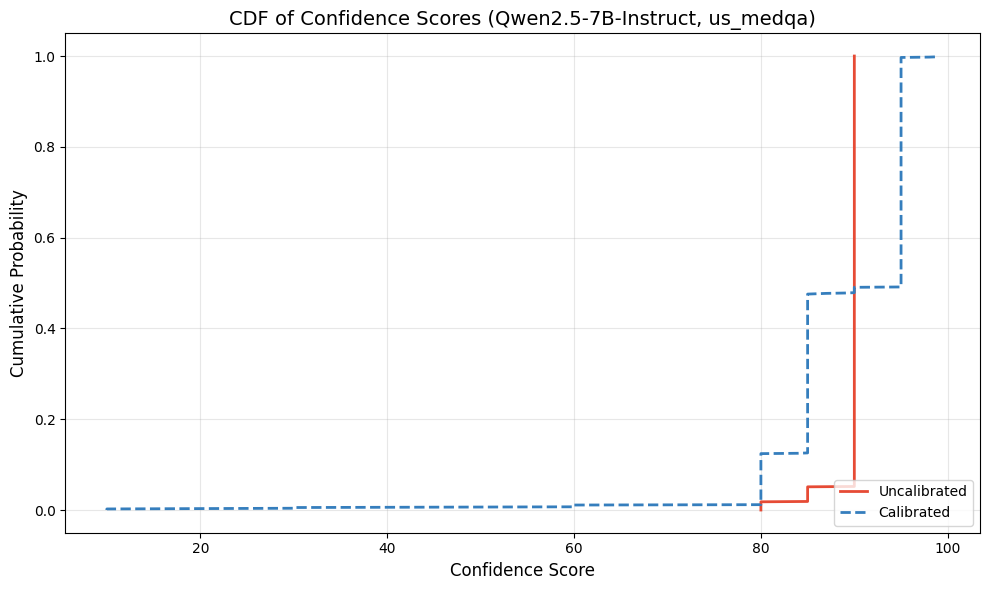

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import json


def plot_cdf(model_name, dataset):
    # 1. 读取数据
    with open(f"{dataset}/{model_name}/results_calibrate.json", "r") as f:
        cal = json.load(f)["confidences"]  # 校准后数据
    with open(f"{dataset}/{model_name}/results_no_calibrate.json", "r") as f:
        noc = json.load(f)["confidences"]  # 未校准数据

    # 2. 数据预处理
    cal_sorted = np.sort(cal)  # 校准数据排序
    noc_sorted = np.sort(noc)  # 未校准数据排序

    # 生成累积概率轴（0-1）
    cal_cumprob = np.linspace(0, 1, len(cal_sorted))
    noc_cumprob = np.linspace(0, 1, len(noc_sorted))

    # 3. 创建画布
    plt.figure(figsize=(10, 6))

    # 4. 绘制主CDF曲线
    plt.plot(noc_sorted, noc_cumprob, color="#E64B35", lw=2, label="Uncalibrated")
    plt.plot(
        cal_sorted,
        cal_cumprob,
        color="#357EBD",
        lw=2,
        linestyle="--",
        label="Calibrated",
    )

    # 6. 美化主图
    plt.xlabel("Confidence Score", fontsize=12)
    plt.ylabel("Cumulative Probability", fontsize=12)
    plt.title(f"CDF of Confidence Scores ({model_name}, {dataset})", fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.legend(loc="lower right")

    plt.tight_layout()
    plt.savefig(f"outputs/{dataset}_{model_name}_cdf.pdf", dpi=800)
    plt.show()


plot_cdf("Qwen2.5-7B-Instruct", "us_medqa")

In [ ]:
# auroc bar plot

data = pd.read_csv("summary.csv")
data

,datset,model_name,enable_calibrate,acc,auroc,valid_rate
0,medqa_us,Llama-3.1-8B-Instruct,False,0.526814,0.655059,0.996072
1,medqa_us,Llama-3.1-8B-Instruct,True,0.491325,0.546754,0.996072
2,medqa,Llama-3.1-8B-Instruct,False,0.549795,0.613778,0.996497
3,medqa,Llama-3.1-8B-Instruct,True,0.488050,0.529868,0.989200
4,medqa,Qwen2.5-7B-Instruct,False,0.620649,0.546839,0.997957
5,medqa,Qwen2.5-7B-Instruct,True,0.627509,0.551791,0.988908
6,gsm8k,Llama-3.1-8B-Instruct,False,0.643243,0.641195,0.981804
7,gsm8k,Llama-3.1-8B-Instruct,True,0.637918,0.561420,0.975739
8,gsm8k,Qwen2.5-7B-Instruct,False,0.887036,0.499317,1.000000
9,gsm8k,Qwen2.5-7B-Instruct,True,0.879257,0.526008,0.979530


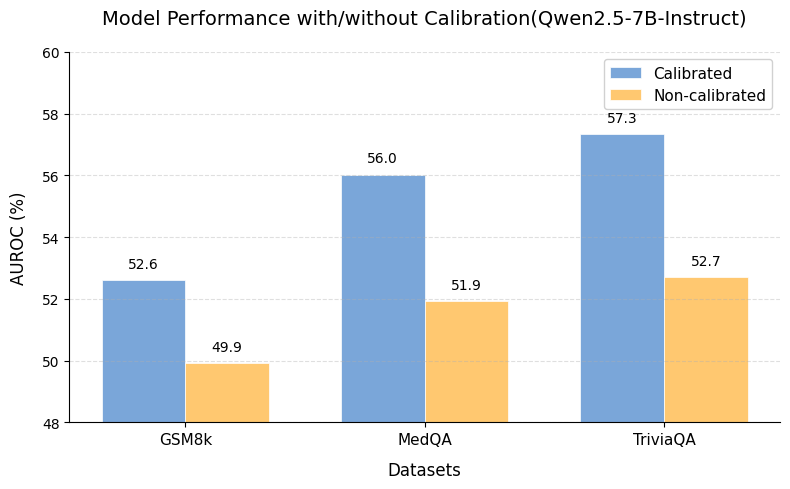

In [ ]:
#
# def plot_bar_plot(model_names: List):
datasets = ["GSM8k", "MedQA", "TriviaQA"]
qwen = [[52.60, 49.93], [56.02, 51.93], [57.33, 52.70]]


calibrated = [x[0] for x in qwen]
non_calibrated = [x[1] for x in qwen]

# 绘图参数
bar_width = 0.35
x = np.arange(len(datasets))
colors = ["#7AA6D9", "#FFC870"]  # 修改为浅色版本


plt.figure(figsize=(8, 5))

# 绘制柱状图
bars1 = plt.bar(
    x - bar_width / 2,
    calibrated,
    width=bar_width,
    label="Calibrated",
    color=colors[0],
    edgecolor="white",
    linewidth=0.5,
)
bars2 = plt.bar(
    x + bar_width / 2,
    non_calibrated,
    width=bar_width,
    label="Non-calibrated",
    color=colors[1],
    edgecolor="white",
    linewidth=0.5,
)

# 标签和标题
plt.xlabel("Datasets", fontsize=12, labelpad=10)
plt.ylabel("AUROC (%)", fontsize=12, labelpad=10)
plt.title(
    "Model Performance with/without Calibration(Qwen2.5-7B-Instruct)",
    fontsize=14,
    pad=20,
)
plt.xticks(x, datasets, fontsize=11)
plt.yticks(fontsize=10)
plt.legend(framealpha=0.9, fontsize=11)


# 智能文本标签位置
def autolabel(bars, offset=0.3):
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2.0,
            height + offset,
            f"{height:.1f}",
            ha="center",
            va="bottom",
            fontsize=10,
        )


autolabel(bars1)
autolabel(bars2)

# 美化设置
plt.ylim(48, 60)
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.savefig("outputs/auroc_qwen_medqa.pdf", dpi=800)

plt.show()